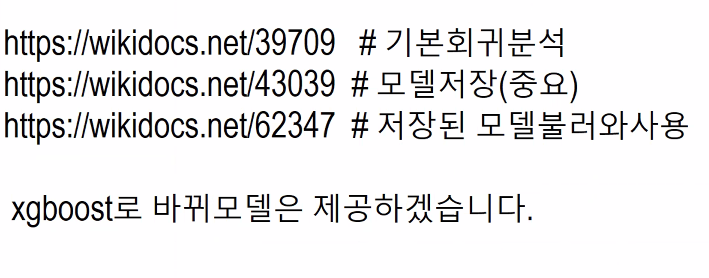

https://wikidocs.net/39709  # 기본회귀분석

https://wikidocs.net/43039  # 모델저장(중요)

https://wikidocs.net/62347  # 저장된 모델불러오기와사용

xgboost로 바뀌모델은 제공하겠습니다.


    https://wikidocs.net/39709
    https://wikidocs.net/39710
    https://wikidocs.net/39693
    https://wikidocs.net/43039

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%82%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%87%E1%85%A5TV%E1%84%80%E1%85%A1%E1%84%80%E1%85%A7%E1%86%A8_%E1%84%8E%E1%85%AC%E1%84%8C%E1%85%A9%E1%86%BC.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%82%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%87%E1%85%A5TV%E1%84%80%E1%85%A1%E1%84%80%E1%85%A7%E1%86%A8_%E1%84%8E%E1%85%AC%E1%84%8C%E1%85%A9%E1%86%BC.xlsx?raw=true', sheet_name='test')


In [3]:
train_df.shape, test_df.shape
(7000, 12), (3000, 12)

search_df = train_df[(train_df['LCD'] == 0) & (train_df['LED'] == 0) & (train_df['OLED'] == 0)]
train_df = train_df.drop(search_df.index, axis=0)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5982 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      5982 non-null   int64
 1   판매가     5982 non-null   int64
 2   화면크기    5982 non-null   int64
 3   형태      5982 non-null   int64
 4   해상도     5982 non-null   int64
 5   화면비율    5982 non-null   int64
 6   LCD     5982 non-null   int64
 7   LED     5982 non-null   int64
 8   OLED    5982 non-null   int64
 9   QLED    5982 non-null   int64
 10  단자      5982 non-null   int64
 11  부가기능    5982 non-null   int64
dtypes: int64(12)
memory usage: 607.5 KB


In [4]:
search_df = train_df[(train_df['LCD']==0) & (train_df['LED']==0) & (train_df['OLED']==0) & (train_df['QLED']==0)]
train_df = train_df.drop(search_df.index, axis=0)
search_df = test_df[(test_df['LCD']==0) & (test_df['LED']==0) & (test_df['OLED']==0) & (test_df['QLED']==0)]
test_df = test_df.drop(search_df.index, axis=0)

print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5982 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      5982 non-null   int64
 1   판매가     5982 non-null   int64
 2   화면크기    5982 non-null   int64
 3   형태      5982 non-null   int64
 4   해상도     5982 non-null   int64
 5   화면비율    5982 non-null   int64
 6   LCD     5982 non-null   int64
 7   LED     5982 non-null   int64
 8   OLED    5982 non-null   int64
 9   QLED    5982 non-null   int64
 10  단자      5982 non-null   int64
 11  부가기능    5982 non-null   int64
dtypes: int64(12)
memory usage: 607.5 KB
None


In [5]:
x_train = train_df.drop(['ID', '판매가'], axis=1)
x_test = test_df.drop(['ID', '판매가'], axis=1)
y_train = train_df['판매가']
y_test = test_df['판매가']

print(x_train.head())

   화면크기  형태   해상도  화면비율  LCD  LED  OLED  QLED  단자  부가기능
0    55   0  2160     1    0    1     0     0   3     1
1    55   0  2160     1    0    1     0     0   3     1
2    55   0  2160     1    0    1     0     0   3     1
3    55   0  2160     1    0    1     0     0   3     1
4    55   0  2160     1    0    1     0     0   3     1


In [6]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [7]:
x_train

array([[  55,    0, 2160, ...,    0,    3,    1],
       [  55,    0, 2160, ...,    0,    3,    1],
       [  55,    0, 2160, ...,    0,    3,    1],
       ...,
       [  49,    0, 1080, ...,    0,    2,    6],
       [  49,    0, 1080, ...,    0,    2,    6],
       [  49,    0, 1080, ...,    0,    2,    6]])

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)  # OLS에 의해 w, b 생성
# model.intercept_
model.coef_

array([ 7.44175378e+04, -1.97266030e+05, -5.34766085e+02, -3.46388771e+05,
       -6.19739748e+05, -6.08053399e+05,  1.22779315e+06, -5.82076609e-11,
       -1.43721860e+05,  1.90097949e+05])

###############################################################

https://wikidocs.net/39709  # 기본회귀분석

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np


In [2]:
##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%82%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%87%E1%85%A5TV%E1%84%80%E1%85%A1%E1%84%80%E1%85%A7%E1%86%A8_%E1%84%8E%E1%85%AC%E1%84%8C%E1%85%A9%E1%86%BC.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%82%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%87%E1%85%A5TV%E1%84%80%E1%85%A1%E1%84%80%E1%85%A7%E1%86%A8_%E1%84%8E%E1%85%AC%E1%84%8C%E1%85%A9%E1%86%BC.xlsx?raw=true', sheet_name='test')

In [3]:

##########데이터 분석

##########데이터 전처리

print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      7000 non-null   int64
 1   판매가     7000 non-null   int64
 2   화면크기    7000 non-null   int64
 3   형태      7000 non-null   int64
 4   해상도     7000 non-null   int64
 5   화면비율    7000 non-null   int64
 6   LCD     7000 non-null   int64
 7   LED     7000 non-null   int64
 8   OLED    7000 non-null   int64
 9   QLED    7000 non-null   int64
 10  단자      7000 non-null   int64
 11  부가기능    7000 non-null   int64
dtypes: int64(12)
memory usage: 656.4 KB
None


In [4]:
# 훈련 데이터셋에서 모든 TV 기술이 0인 행을 찾습니다.
search_df = train_df[(train_df['LCD']==0) & (train_df['LED']==0) & (train_df['OLED']==0) & (train_df['QLED']==0)]
# 찾은 행을 훈련 데이터셋에서 제거합니다.
train_df = train_df.drop(search_df.index, axis=0)

# 테스트 데이터셋에서 모든 TV 기술이 0인 행을 찾습니다.
search_df = test_df[(test_df['LCD']==0) & (test_df['LED']==0) & (test_df['OLED']==0) & (test_df['QLED']==0)]
# 찾은 행을 테스트 데이터셋에서 제거합니다.
test_df = test_df.drop(search_df.index, axis=0)

# 수정된 훈련 데이터셋의 정보를 출력합니다.
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6636 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      6636 non-null   int64
 1   판매가     6636 non-null   int64
 2   화면크기    6636 non-null   int64
 3   형태      6636 non-null   int64
 4   해상도     6636 non-null   int64
 5   화면비율    6636 non-null   int64
 6   LCD     6636 non-null   int64
 7   LED     6636 non-null   int64
 8   OLED    6636 non-null   int64
 9   QLED    6636 non-null   int64
 10  단자      6636 non-null   int64
 11  부가기능    6636 non-null   int64
dtypes: int64(12)
memory usage: 674.0 KB
None


In [5]:
# 훈련 데이터셋에서 'ID'와 '판매가'를 제외한 모든 열을 x_train으로 설정합니다.
x_train = train_df.drop(['ID', '판매가'], axis=1)
# 테스트 데이터셋에서 'ID'와 '판매가'를 제외한 모든 열을 x_test으로 설정합니다.
x_test = test_df.drop(['ID', '판매가'], axis=1)
# 훈련 데이터셋의 '판매가' 열을 y_train으로 설정합니다.
y_train = train_df['판매가']
# 테스트 데이터셋의 '판매가' 열을 y_test으로 설정합니다.
y_test = test_df['판매가']

# x_train의 첫 5행을 출력합니다.
print(x_train.head())

   화면크기  형태   해상도  화면비율  LCD  LED  OLED  QLED  단자  부가기능
0    55   0  2160     1    0    1     0     0   3     1
1    55   0  2160     1    0    1     0     0   3     1
2    55   0  2160     1    0    1     0     0   3     1
3    55   0  2160     1    0    1     0     0   3     1
4    55   0  2160     1    0    1     0     0   3     1


In [6]:
# 훈련 데이터셋과 테스트 데이터셋을 numpy 배열로 변환합니다.
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()


In [7]:
##########모델 생성

model = LinearRegression()

In [8]:

##########모델 학습

model.fit(x_train, y_train)

LinearRegression()

In [9]:
##########모델 검증

print(model.score(x_test, y_test)) #0.5462414358589345


0.5365762057290644


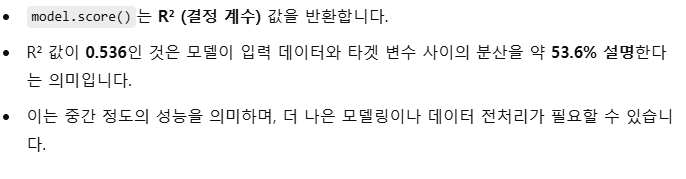

In [10]:
##########모델 예측

x_test = np.array([
    [55, 0, 2160, 1, 0, 1, 0, 0, 3, 1]
])

y_predict = model.predict(x_test)

print(y_predict[0]) #694212.0204504852

764228.640846139


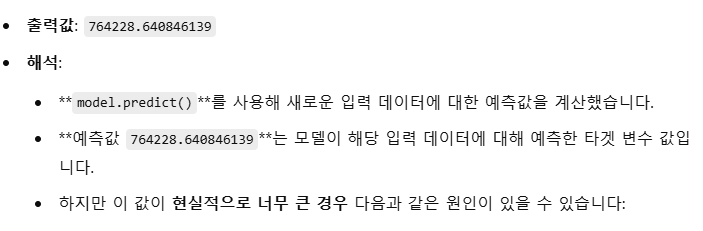

############################################################


https://wikidocs.net/43039  # 모델저장(중요)

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle
import numpy as np
import os

##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%82%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%87%E1%85%A5TV%E1%84%80%E1%85%A1%E1%84%80%E1%85%A7%E1%86%A8_%E1%84%8E%E1%85%AC%E1%84%8C%E1%85%A9%E1%86%BC.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%82%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%87%E1%85%A5TV%E1%84%80%E1%85%A1%E1%84%80%E1%85%A7%E1%86%A8_%E1%84%8E%E1%85%AC%E1%84%8C%E1%85%A9%E1%86%BC.xlsx?raw=true', sheet_name='test')

In [26]:
##########데이터 분석

##########데이터 전처리
# 훈련 데이터셋 정보 출력
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      7000 non-null   int64
 1   판매가     7000 non-null   int64
 2   화면크기    7000 non-null   int64
 3   형태      7000 non-null   int64
 4   해상도     7000 non-null   int64
 5   화면비율    7000 non-null   int64
 6   LCD     7000 non-null   int64
 7   LED     7000 non-null   int64
 8   OLED    7000 non-null   int64
 9   QLED    7000 non-null   int64
 10  단자      7000 non-null   int64
 11  부가기능    7000 non-null   int64
dtypes: int64(12)
memory usage: 656.4 KB
None


In [27]:
# 모든 TV 기술이 0인 행을 찾아 훈련 데이터셋에서 제거
search_df = train_df[(train_df['LCD']==0) & (train_df['LED']==0) & (train_df['OLED']==0) & (train_df['QLED']==0)]
train_df = train_df.drop(search_df.index, axis=0)

# 모든 TV 기술이 0인 행을 찾아 테스트 데이터셋에서 제거
search_df = test_df[(test_df['LCD']==0) & (test_df['LED']==0) & (test_df['OLED']==0) & (test_df['QLED']==0)]
test_df = test_df.drop(search_df.index, axis=0)

# 데이터 전처리 후 훈련 데이터셋 정보 출력
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6636 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      6636 non-null   int64
 1   판매가     6636 non-null   int64
 2   화면크기    6636 non-null   int64
 3   형태      6636 non-null   int64
 4   해상도     6636 non-null   int64
 5   화면비율    6636 non-null   int64
 6   LCD     6636 non-null   int64
 7   LED     6636 non-null   int64
 8   OLED    6636 non-null   int64
 9   QLED    6636 non-null   int64
 10  단자      6636 non-null   int64
 11  부가기능    6636 non-null   int64
dtypes: int64(12)
memory usage: 674.0 KB
None


In [28]:
x_train = train_df.drop(['ID', '판매가'], axis=1)
x_test = test_df.drop(['ID', '판매가'], axis=1)
y_train = train_df['판매가']
y_test = test_df['판매가']

print(x_train.head())

   화면크기  형태   해상도  화면비율  LCD  LED  OLED  QLED  단자  부가기능
0    55   0  2160     1    0    1     0     0   3     1
1    55   0  2160     1    0    1     0     0   3     1
2    55   0  2160     1    0    1     0     0   3     1
3    55   0  2160     1    0    1     0     0   3     1
4    55   0  2160     1    0    1     0     0   3     1


In [29]:
# x_train과 x_test를 numpy 배열로 변환
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

# 모델 디렉토리가 없으면 생성
if not os.path.exists('models/naver_shopping_tv_price_regression_model'):
    os.makedirs('models/naver_shopping_tv_price_regression_model')

In [30]:

##########모델 생성

model = LinearRegression()

In [31]:
##########모델 학습

model.fit(x_train, y_train)

LinearRegression()

In [33]:
##########모델 검증

# 훈련 데이터셋에 대한 모델의 정확도 출력
print(model.score(x_train, y_train))

# 테스트 데이터셋에 대한 모델의 정확도 출력
print(model.score(x_test, y_test))

# 모델을 저장하는 코드
with open('models/naver_shopping_tv_price_regression_model/model.pkl', 'wb') as f:
    pickle.dump(model, f)


0.5676150643429947
0.5365762057290644


In [34]:
##########모델 예측

x_test = np.array([
    [55, 0, 2160, 1, 0, 1, 0, 0, 3, 1]
])

y_predict = model.predict(x_test)

print(y_predict[0]) #694212.0204504852

764228.640846139


####################################################################


https://wikidocs.net/62347  # 저장된 모델불러오기와사용

In [36]:
import pandas as pd
from sklearn.linear_model import Ridge
import numpy as np

In [37]:
##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%82%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%87%E1%85%A5TV%E1%84%80%E1%85%A1%E1%84%80%E1%85%A7%E1%86%A8_%E1%84%8E%E1%85%AC%E1%84%8C%E1%85%A9%E1%86%BC.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%82%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%87%E1%85%A5TV%E1%84%80%E1%85%A1%E1%84%80%E1%85%A7%E1%86%A8_%E1%84%8E%E1%85%AC%E1%84%8C%E1%85%A9%E1%86%BC.xlsx?raw=true', sheet_name='test')

In [38]:
##########데이터 분석

##########데이터 전처리

print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      7000 non-null   int64
 1   판매가     7000 non-null   int64
 2   화면크기    7000 non-null   int64
 3   형태      7000 non-null   int64
 4   해상도     7000 non-null   int64
 5   화면비율    7000 non-null   int64
 6   LCD     7000 non-null   int64
 7   LED     7000 non-null   int64
 8   OLED    7000 non-null   int64
 9   QLED    7000 non-null   int64
 10  단자      7000 non-null   int64
 11  부가기능    7000 non-null   int64
dtypes: int64(12)
memory usage: 656.4 KB
None


In [39]:
# train_df에서 모든 TV 기술이 0인 행을 찾아 제거합니다.
search_df = train_df[(train_df['LCD']==0) & (train_df['LED']==0) & (train_df['OLED']==0) & (train_df['QLED']==0)]
train_df = train_df.drop(search_df.index, axis=0)

# test_df에서도 모든 TV 기술이 0인 행을 찾아 제거합니다.
search_df = test_df[(test_df['LCD']==0) & (test_df['LED']==0) & (test_df['OLED']==0) & (test_df['QLED']==0)]
test_df = test_df.drop(search_df.index, axis=0)

# train_df의 정보를 출력합니다.
print(train_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 6636 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      6636 non-null   int64
 1   판매가     6636 non-null   int64
 2   화면크기    6636 non-null   int64
 3   형태      6636 non-null   int64
 4   해상도     6636 non-null   int64
 5   화면비율    6636 non-null   int64
 6   LCD     6636 non-null   int64
 7   LED     6636 non-null   int64
 8   OLED    6636 non-null   int64
 9   QLED    6636 non-null   int64
 10  단자      6636 non-null   int64
 11  부가기능    6636 non-null   int64
dtypes: int64(12)
memory usage: 674.0 KB
None


In [40]:
x_train = train_df.drop(['ID', '판매가'], axis=1)
x_test = test_df.drop(['ID', '판매가'], axis=1)
y_train = train_df['판매가']
y_test = test_df['판매가']

print(x_train.head())

   화면크기  형태   해상도  화면비율  LCD  LED  OLED  QLED  단자  부가기능
0    55   0  2160     1    0    1     0     0   3     1
1    55   0  2160     1    0    1     0     0   3     1
2    55   0  2160     1    0    1     0     0   3     1
3    55   0  2160     1    0    1     0     0   3     1
4    55   0  2160     1    0    1     0     0   3     1


In [41]:

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()


In [42]:

##########모델 생성

model = Ridge(alpha=1.0)


In [43]:
##########모델 학습

model.fit(x_train, y_train)


Ridge()

In [44]:

##########모델 검증

print(model.score(x_train, y_train)) #

print(model.score(x_test, y_test)) #0.5462414358589345

0.5676121660464679
0.5365924719385907


In [45]:

##########모델 예측

x_test = np.array([
    [55, 0, 2160, 1, 0, 1, 0, 0, 3, 1]
])

y_predict = model.predict(x_test)

print(y_predict[0]) #694212.0204504852

764426.7110979394


# Ridge 회귀와 선형 회귀 모델 비교

Ridge 회귀와 선형 회귀를 비교할 때 **모델의 성능 지표**와 **일반화 성능**을 기준으로 평가해야 합니다.

---

## **1. 주요 비교 기준**

### **(1) 성능 평가 지표 (R² 점수)**
- **R² (결정계수)**: 모델이 데이터를 얼마나 잘 설명하는지를 나타냄.
- **값 범위**: `0 ~ 1` (1에 가까울수록 좋은 모델)

#### **예시 코드**:
```python
print("Linear Regression Train R2:", model_linear.score(x_train, y_train))
print("Linear Regression Test R2:", model_linear.score(x_test, y_test))

print("Ridge Regression Train R2:", model_ridge.score(x_train, y_train))
print("Ridge Regression Test R2:", model_ridge.score(x_test, y_test))


결과 해석:
테스트 R²가 더 높은 모델이 일반적으로 더 좋습니다.
Ridge 회귀는 L2 규제로 과적합을 줄이고 일반화 성능을 높입니다.

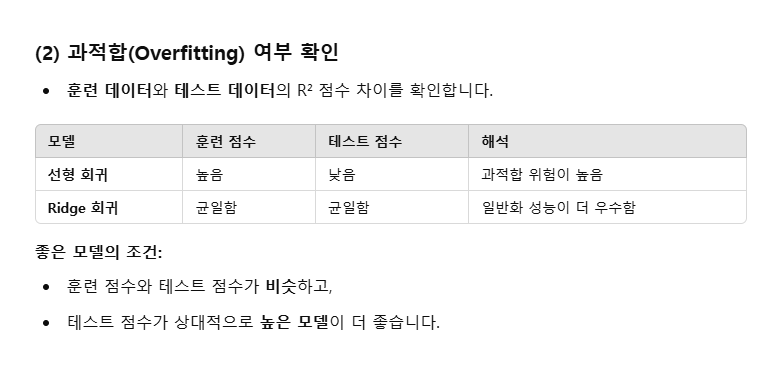

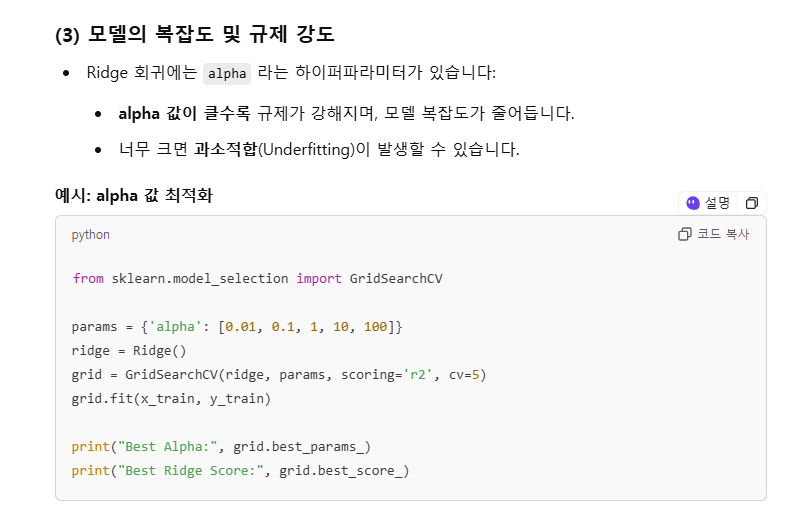

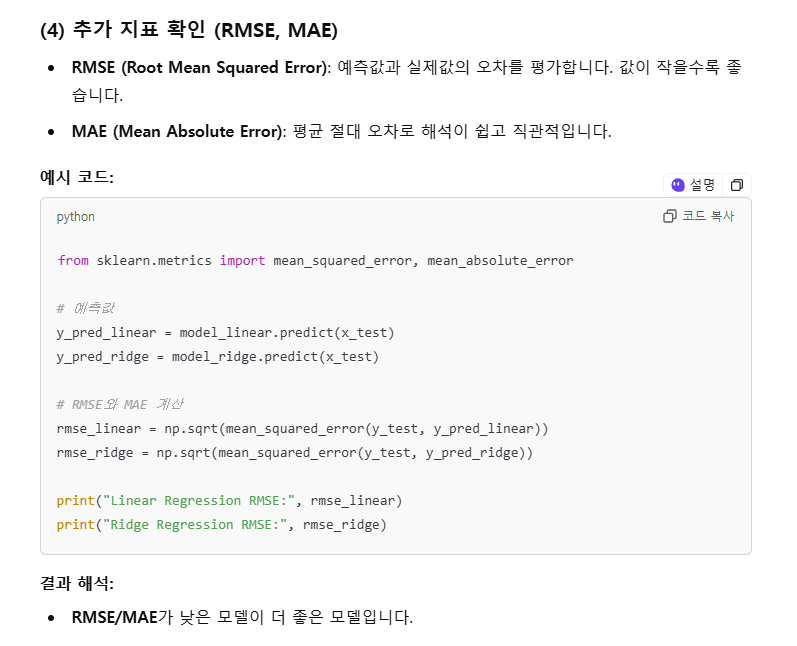

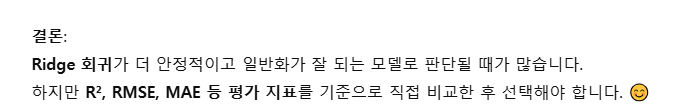